# Wine Quality Capstone #

### Problem in Question:  Can we predict the quality of wine, based on many given features, such as wine type, pH, fixed acidity, volatile acidity, citric acid, residual sugars, chlorides, free sulfur dioxide present, total sulfur dioxide present, density, sulphates, and alcohol content?   ### 

Data Source: https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/

Summary of plan: After cleaning the dataset, I plan to visualize and determine feature correlations, eliminating features if needed. Then I will use 3 different machine learning algorithms to compare models, finding the best one for predicting wine quality. I will use cross-validation to determine the best model, as well as error analysis.  


## 1. Importing Packages and Data ## 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
# Normalization scaler
from sklearn.preprocessing import MinMaxScaler
# Error checking
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Classifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [2]:
wine_data = pd.read_csv('winequalityN.csv')
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine_data.shape

(6497, 13)

## 2. Data Cleaning ## 

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


The data types are all what we would expect for each feature. 

In [6]:
# Identifying null value and what percent of each column is made up of null values. 
wine_data_null = pd.concat([wine_data.isnull().sum(), 100 * wine_data.isnull().mean()], axis=1)
wine_data_null.columns=["null count","% of column null"]
wine_data_null.sort_values(by=["null count","% of column null"])

,null count,% of column null
type,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
alcohol,0,0.000000
quality,0,0.000000
residual sugar,2,0.030783
chlorides,2,0.030783
citric acid,3,0.046175
sulphates,4,0.061567


Fixed acidity showed the greatest count of null values as a feature, though even it had <1% of its total values as null values. 

In [7]:
# Dropping null value containing rows from dataset. 
wine_df = wine_data.dropna()
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


As we can see from the info above, 34 rows were dropped due to null values. Removing this many rows is still just removing ~0.5% of the total rows, not strongly influecing the amount of data provided. 

## 3. Exploring and Visualizing the Data ## 

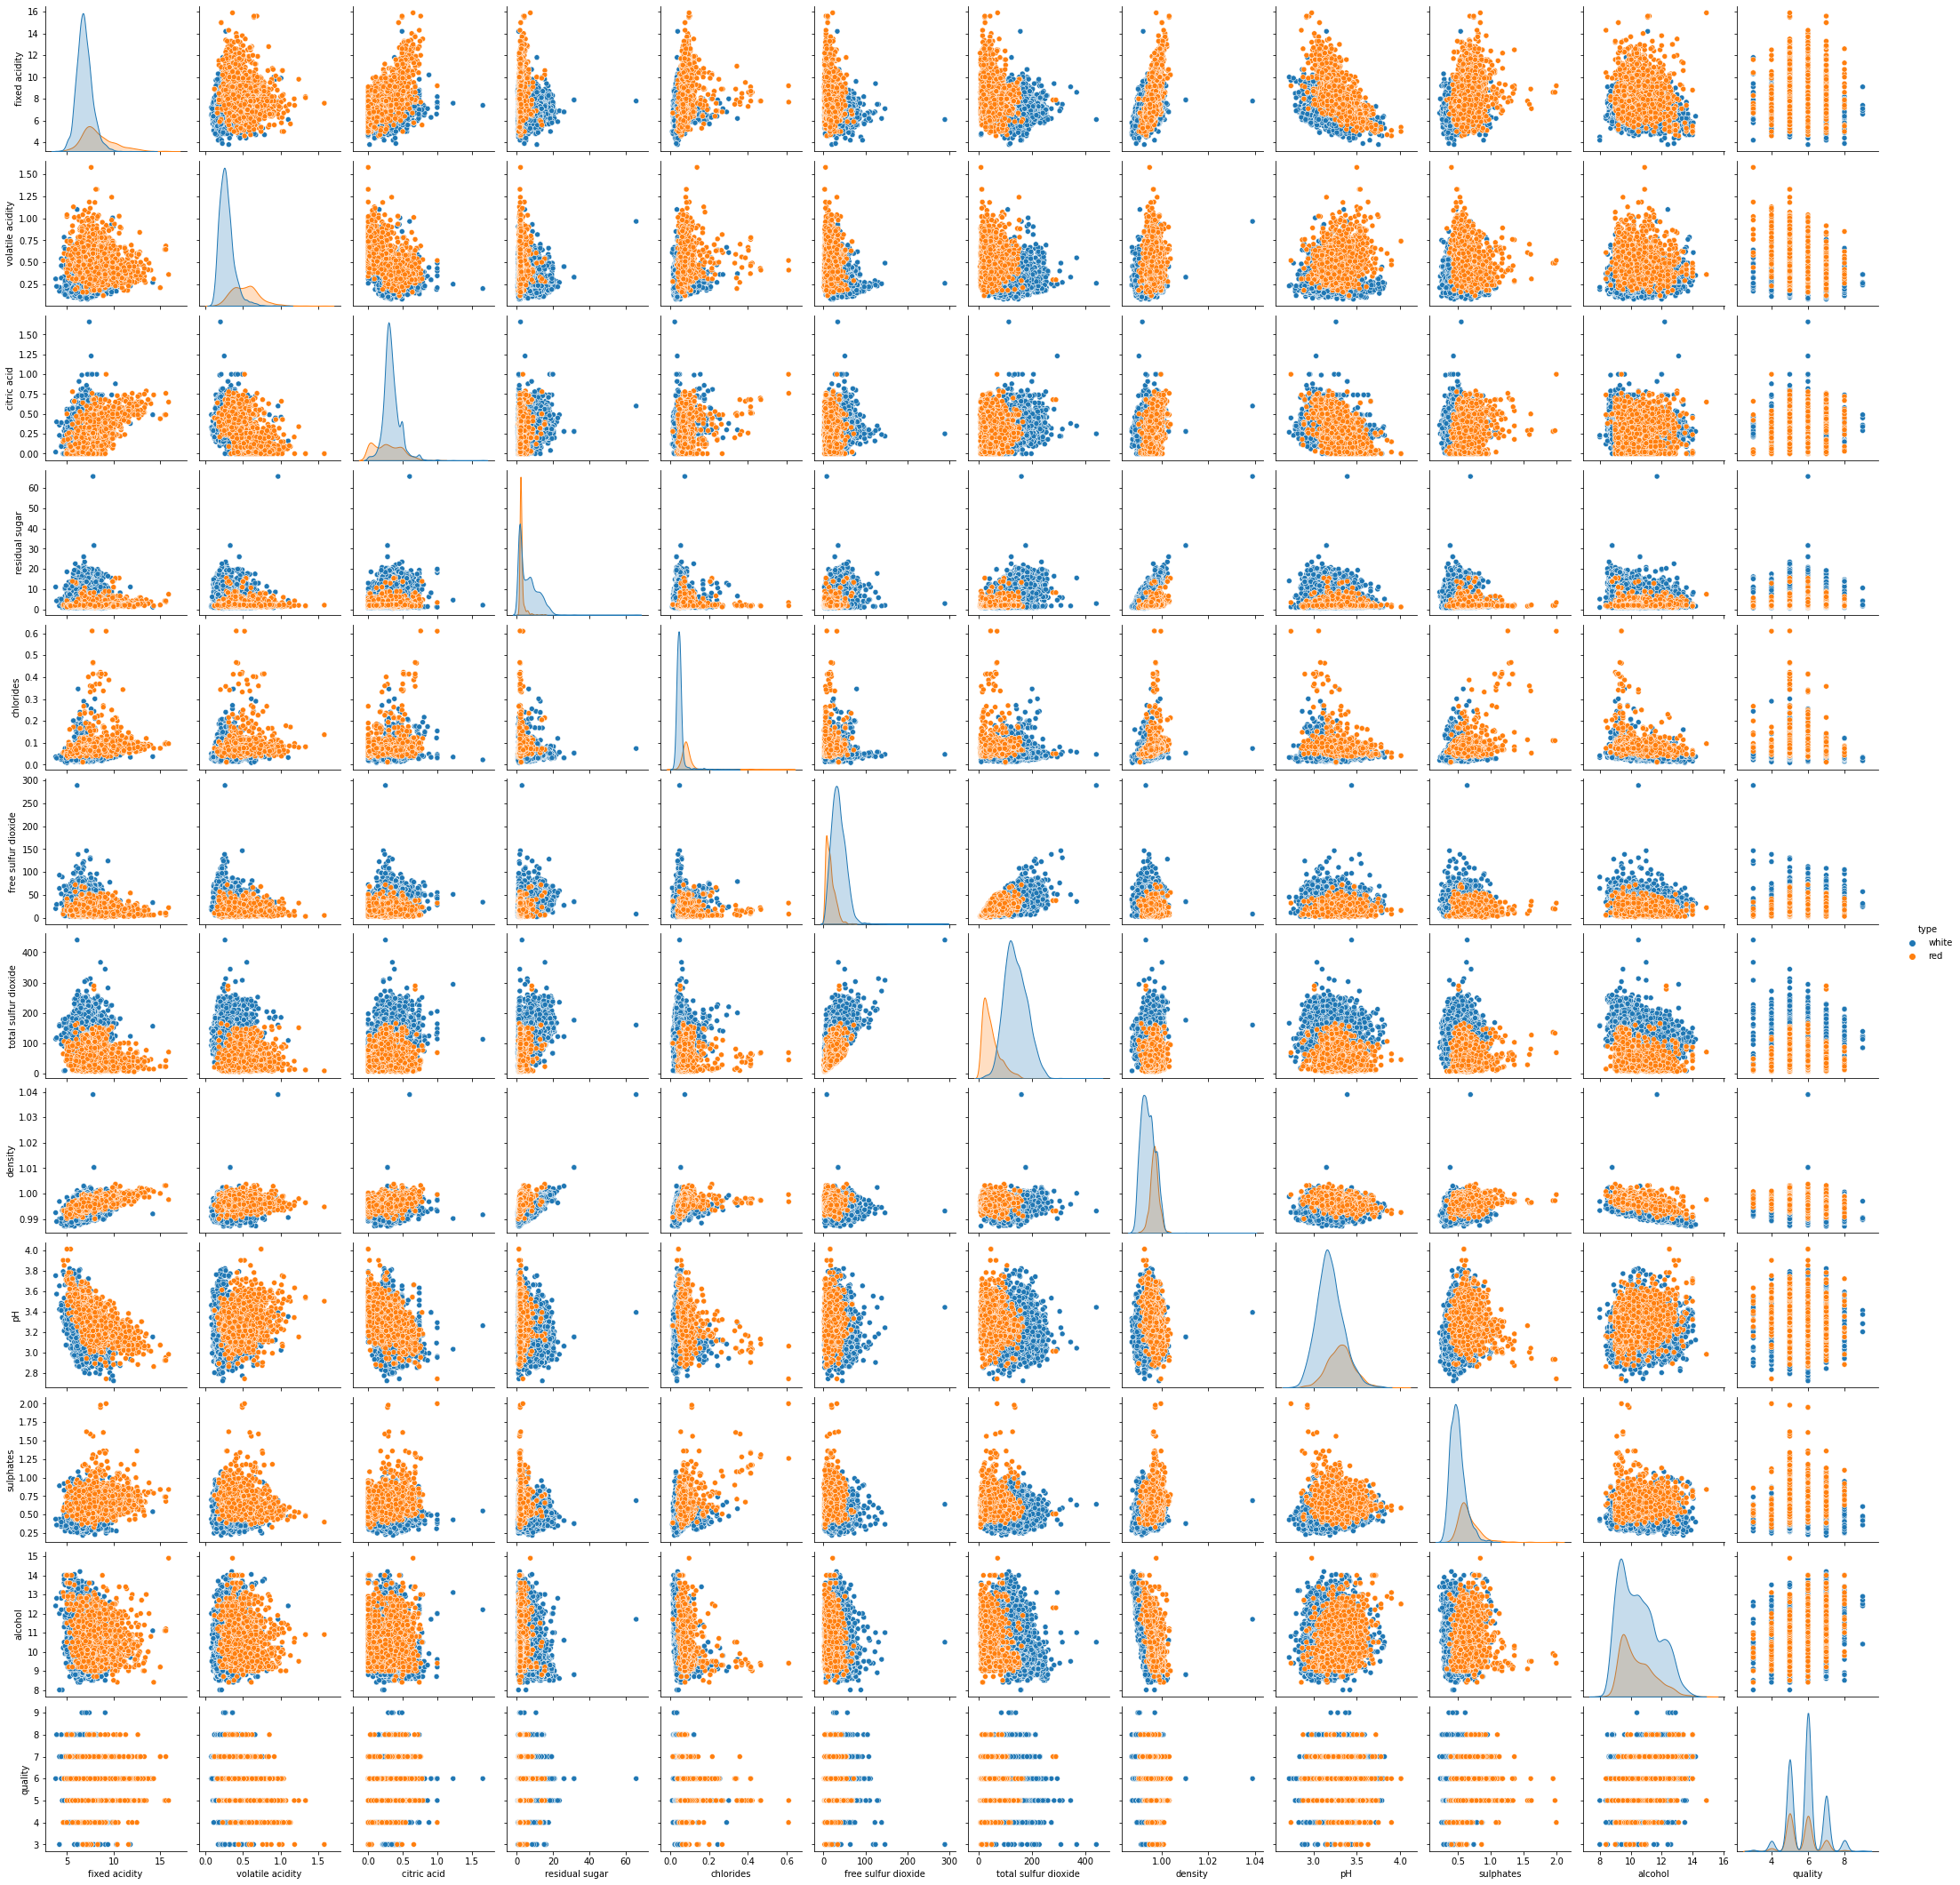

In [8]:
# Plotting key features against one another, showing results by type of wine - red or white. 
# Red wine appears as orange data points, and white wine appears as blue data points. 
sns.pairplot(wine_df, hue='type')
plt.show()

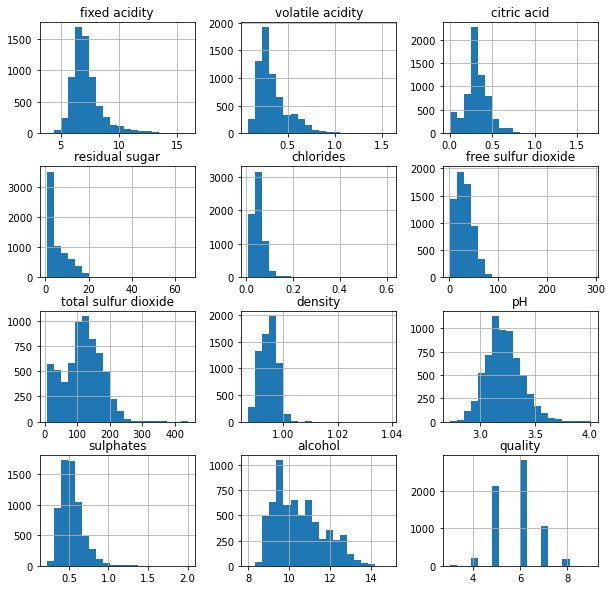

In [9]:
# Plotting histograms to get a better look at all wine comparisons at each feature.
wine_df.hist(bins=20,figsize=(10,10))
plt.show()

C:\Users\jared\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


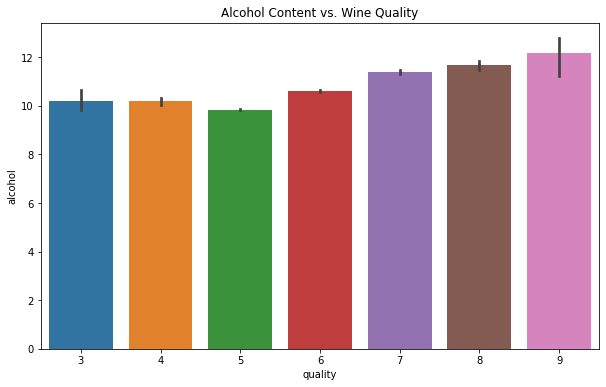

In [10]:
# Do higher quality wines have higher alcohol content? Plotting a barplot.
plt.figure(figsize=[10,6])
sns.barplot(wine_df['quality'],wine_df['alcohol'])
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

Wines with higher quality tend to have slightly higher alcohol content.

C:\Users\jared\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


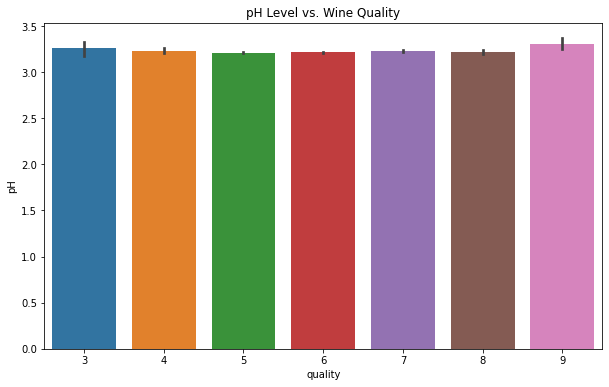

In [11]:
# Do higher quality wines have higher pH? Plotting a barplot.
plt.figure(figsize=[10,6])
sns.barplot(wine_df['quality'],wine_df['pH'])
plt.title('pH Level vs. Wine Quality')
plt.show()

There is no noticeable relationship between pH level and wine quality. 

Text(0.5, 1.0, 'Correlations Between Wine Features')

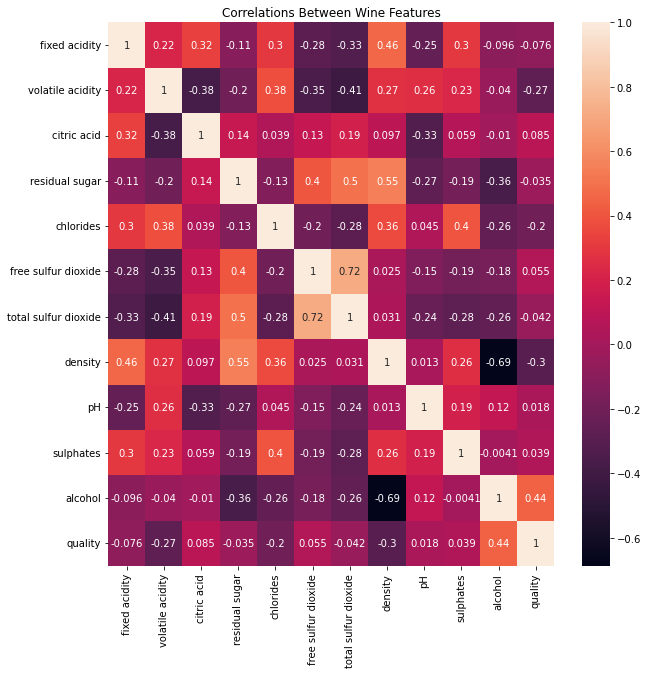

In [12]:
# Plotting the correlation levels between any two features using heatmap and Pearson correlation coefficient.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(wine_df.corr(), annot=True)
plt.title("Correlations Between Wine Features")

## 4. Feature and Target Manipulation ##

I'll identify features that have higher than a 0.7 correlation with one another or lower than -0.7 correlation with one another. If there is a feature with high correlation like this case (when coefficient > 0.7 or < -0.7), I will drop the column, because its weight on data trends are represented in other features.

In [13]:
# Initialize list of columns to drop.
drop_corr = []
# Iterate over columns
for i in range(len(wine_df.corr().keys())):
    # Iterate over rows
    for k in range(i):
        if abs(wine_df.corr().iloc[i,k]) > 0.7:
            drop_corr = wine_df.corr().columns[i]
print(drop_corr)

total sulfur dioxide


Total sulfur dioxide was correlated with other features, so I will drop this feature and keep the others. 

In [14]:
new_df = wine_df.drop('total sulfur dioxide',axis = 1)

It is important to change the categorical data from string type to numeric (in this case binary) type. The only categorical column happens to be wine type - either red or white wine. 

In [15]:
# Selecting the categorical columns of new_df.
category_data = new_df.select_dtypes(include='O')
# Creating dummies of the categorical columns.
new_df_dummies = pd.get_dummies(new_df,drop_first = True)
print(new_df_dummies)
print(category_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

As seen in the above output, the column for wine type includes binary entries (0='red' wine and 1='white' wine).

Since our goal involves identifying the driver of high quality in wine, I will create a new column in the dataframe that identifies whether each wine is 'best quality' or not (i.e. if the wine has a quality >= 7, it is considered high quality). This will allow us to use classification algorithms when we train and test. The 'best quality' feature is now our target variable. 

In [16]:
# Creating a column 'best quality' to identify which wines have quality ratings above 7. 
# If the quality is >= 7, than the entry is 1; if quality is < 7, than the entry is 0, leaving a 
# binary column identifying whether or not a wine is of best quality. 
new_df_dummies['best quality'] = [1 if x>=7 else 0 for x in wine_df.quality]


# Defining a function to highlight the 'best quality' column in the dataframe. Print output.
def highlight_cols(x): 
    # copy df to new - original data is not changed
    df = x.copy()  
    # select 'best quality' column to yellow color and all other columns to white
    df.iloc[:,:] = 'background-color: white'
    df[['best quality']] = 'background-color: yellow'  
    # return color df
    return df 
print("Highlighted DataFrame :")
display(new_df_dummies.head(14).style.apply(highlight_cols, axis = None))

Highlighted DataFrame :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,best quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,1.001000,3.000000,0.450000,8.800000,6,1,0
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,0.994000,3.300000,0.490000,9.500000,6,1,0
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,0.995100,3.260000,0.440000,10.100000,6,1,0
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,0.995600,3.190000,0.400000,9.900000,6,1,0
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,0.995600,3.190000,0.400000,9.900000,6,1,0
5,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,0.995100,3.260000,0.440000,10.100000,6,1,0
6,6.200000,0.320000,0.160000,7.000000,0.045000,30.000000,0.994900,3.180000,0.470000,9.600000,6,1,0
7,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,1.001000,3.000000,0.450000,8.800000,6,1,0
8,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,0.994000,3.300000,0.490000,9.500000,6,1,0
9,8.100000,0.220000,0.430000,1.500000,0.044000,28.000000,0.993800,3.220000,0.450000,11.000000,6,1,0


## 5. Train Test Splitting ##

In [17]:
# Train test splitting: y variable is our 'best quality' column. X variable is all other data, 
# excluding 'quality' column. Again, we are identifying which wines are 'best quality' or not. 

X = new_df_dummies.drop(['quality','best quality'],axis=1)
y = new_df_dummies['best quality']
 
# Creating train test splits. 80% train, 20% test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=40)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(5170, 11) (5170,)
(1293, 11) (1293,)


## 6. Scaling the Data ##

Because the features are all scaled differently, I will scale them using sklearn's MinMaxScaler() function. This scales data between 0 and 1, normalizing the data.  

In [18]:
# Initializing the scaler in variable 'normal'
normal = MinMaxScaler()
# Fitting data to the scale
normal_fit = normal.fit(Xtrain)
# Transforming the training and testing data.
Xtrain_scal = normal_fit.transform(Xtrain)
Xtest_scal = normal_fit.transform(Xtest)
print(Xtrain_scal, Xtest_scal)

[[0.15384615 0.08666667 0.14457831 ... 0.27683616 0.33870968 1.        ]
 [0.24786325 0.39333333 0.18072289 ... 0.24858757 0.16129032 1.        ]
 [0.23076923 0.32       0.08433735 ... 0.22033898 0.59677419 0.        ]
 ...
 [0.27350427 0.25333333 0.12048193 ... 0.23163842 0.38709677 0.        ]
 [0.26495726 0.23333333 0.01204819 ... 0.32768362 0.41935484 0.        ]
 [0.21367521 0.16       0.1626506  ... 0.27118644 0.72580645 1.        ]] [[0.41025641 0.29333333 0.05421687 ... 0.3559322  0.41935484 0.        ]
 [0.25641026 0.04       0.22891566 ... 0.17514124 0.5483871  1.        ]
 [0.29059829 0.06666667 0.18674699 ... 0.1299435  0.16129032 1.        ]
 ...
 [0.25641026 0.10666667 0.19879518 ... 0.0960452  0.74193548 1.        ]
 [0.29059829 0.09333333 0.24698795 ... 0.20338983 0.14516129 1.        ]
 [0.31623932 0.13333333 0.23493976 ... 0.24858757 0.32258065 1.        ]]


Now our data are clearly scaled between 0 and 1! The training and testing data are in array form. 

## 7. Model Fitting and Testing ##

I will fit a number of models to the data to determine which works best at predicting the target variable using the other features. The following algorithms will be applied and compared to one another:
- Random Forest Classifier
- Logistic Regression Classifier
- Gradient Boosting Decision Tree Classifier

Note again that 0 represents wines that have a quality <7 and 1 represents wines that have quality >=7. 

### 7.1 Random Forest Classifier

In [44]:
# Defining random forest classifier model
RFC = RandomForestClassifier(random_state=47)
 
# Fitting the model
RFC_fit = RFC.fit(Xtrain_scal,ytrain)

# Calculating the accuracy score
RFC_score = RFC.score(Xtest_scal,ytest)

y_predict_RFC = RFC.predict(Xtest_scal)
 
# Calculating mean_squared error
MSE = mean_squared_error(ytest,y_predict_RFC)
# Calculating root mean squared error
RMSE = np.sqrt(MSE)
# Cross validation score (5-fold cross-validation)
RFC_CVS5_train = cross_val_score(RFC,Xtrain_scal,ytrain,cv=5,scoring='roc_auc').mean()
RFC_CVS5_test = cross_val_score(RFC,Xtest_scal,ytest,cv=5,scoring='roc_auc').mean()
RFC_CVS5_test_STD = RFC_CVS5_test.std()

print('Model Score : ', RFC_score)
print('.................................')
print('Mean cross validation test score : ', RFC_CVS5_train)
print('Mean cross validation train score : ', RFC_CVS5_test)
print('.................................')
print('Error Calculation ')
print('Mean Squared Error : ', MSE)
print('Root Mean Squared Error : ', RMSE)
print(classification_report(ytest,y_predict_RFC))

Model Score :  0.8948182521268369
.................................
Mean cross validation test score :  0.9053014318941607
Mean cross validation train score :  0.8645407117050512
.................................
Error Calculation 
Mean Squared Error :  0.10518174787316319
Root Mean Squared Error :  0.3243173567251114
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1048
           1       0.81      0.58      0.68       245

    accuracy                           0.89      1293
   macro avg       0.86      0.78      0.81      1293
weighted avg       0.89      0.89      0.89      1293



### 7.2 Logistic Regression

In [45]:
# Defining logistic regression classifier model
LR = LogisticRegression()
 
# Fitting the model
LR_fit = LR.fit(Xtrain_scal,ytrain)

# Calculating the accuracy score
LR_score = LR.score(Xtest_scal,ytest)

y_predict_LR = LR.predict(Xtest_scal)

# Calculating mean_squared error
MSE = mean_squared_error(ytest,y_predict_LR)
# Calculating root mean squared error
RMSE = np.sqrt(MSE)
# Cross validation score (5-fold cross-validation)
LR_CVS5_train = cross_val_score(LR,Xtrain_scal,ytrain,cv=5,scoring='roc_auc').mean()
LR_CVS5_test = cross_val_score(LR,Xtest_scal,ytest,cv=5,scoring='roc_auc').mean()


print('Model Score : ', LR_score)
print('.................................')
print('Mean cross validation test score : ', LR_CVS5_train)
print('Mean cross validation train score : ', LR_CVS5_test)
print('.................................')
print('Error Calculation ')
print('Mean Squared Error : ', MSE)
print('Root Mean Squared Error : ', RMSE)
print(classification_report(ytest,y_predict_LR))

Model Score :  0.819798917246713
.................................
Mean cross validation test score :  0.798598118687698
Mean cross validation train score :  0.8132087175266551
.................................
Error Calculation 
Mean Squared Error :  0.18020108275328692
Root Mean Squared Error :  0.42450098086257343
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1048
           1       0.56      0.24      0.33       245

    accuracy                           0.82      1293
   macro avg       0.70      0.60      0.61      1293
weighted avg       0.79      0.82      0.79      1293



### 7.3 Gradient Boosting 

In [46]:
# Defining random forest classifier model
GBC = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=47, max_depth=9, max_leaf_nodes=100)

# Fitting the model
GBC_fit = GBC.fit(Xtrain_scal, ytrain)
#GBC.fit(Xtrain_scal, ytrain)
 
# Calculating the accuracy score
GBC_score = GBC.score(Xtest_scal,ytest)

y_predict_GBC = GBC.predict(Xtest_scal)
 
# Calculating mean_squared error
MSE = mean_squared_error(ytest,y_predict_GBC)
# Calculating root mean squared error
RMSE = np.sqrt(MSE)
# Cross validation score (5-fold cross-validation)
GBC_CVS5_train = cross_val_score(GBC,Xtrain_scal,ytrain,cv=5,scoring='roc_auc').mean()
GBC_CVS5_test = cross_val_score(GBC,Xtest_scal,ytest,cv=5,scoring='roc_auc').mean()

print('Model Score : ', GBC_score)
print('.................................')
print('Mean cross validation test score : ', GBC_CVS5_train)
print('Mean cross validation train score : ', GBC_CVS5_test)
print('.................................')
print('Error Calculation ')
print('Mean Squared Error : ', MSE)
print('Root Mean Squared Error : ', RMSE)
print(classification_report(ytest,y_predict_GBC))

Model Score :  0.8847641144624904
.................................
Mean cross validation test score :  0.9013590895590833
Mean cross validation train score :  0.8584346766731299
.................................
Error Calculation 
Mean Squared Error :  0.11523588553750967
Root Mean Squared Error :  0.3394641152427008
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1048
           1       0.75      0.59      0.66       245

    accuracy                           0.88      1293
   macro avg       0.83      0.77      0.79      1293
weighted avg       0.88      0.88      0.88      1293



### 7.4 Comparing Algorithms

In [49]:
# Creating a table of all algorithms and their respective model performances. 
labels = [ 'Random Forest', 'Logistic Regression','Gradient Boost' ]
scores_test= [ RFC_CVS5_test, LR_CVS5_test, GBC_CVS5_test ]
scores_train= [ RFC_CVS5_train, LR_CVS5_train, GBC_CVS5_train ]
accuracy_score = [ RFC_score, LR_score, GBC_score ]

score_table_acc = pd.DataFrame(list(zip(labels, accuracy_score)), 
               columns =['Algorithm', '     Model Accuracy']) 

score_table = pd.DataFrame(list(zip(labels, scores_train, scores_test)), 
               columns =['Algorithm', '5-fold CV train score', '5-fold CV test score' ]) 
print(score_table_acc)

score_table

             Algorithm       Model Accuracy
0        Random Forest             0.894818
1  Logistic Regression             0.819799
2       Gradient Boost             0.884764


,Algorithm,5-fold CV train score,5-fold CV test score
0,Random Forest,0.905301,0.864541
1,Logistic Regression,0.798598,0.813209
2,Gradient Boost,0.901359,0.858435


The best performing model is clearly Random Forest, though Gradient Boosting Decision Trees was quite close in performance as well. This makes sense, seeing as both Random Forest and Gradient Boost are ensemble decision tree methods. 